In [2]:
%matplotlib notebook

# Color_map plots

In [3]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
import My_functions_v2 as my

### Find interesting periodes

In [4]:
Half_orbit = pd.read_pickle('/home/simon/Desktop/Bachelor_project/data/pkl_files/half_orbit_means.pkl')

<IPython.core.display.Javascript object>


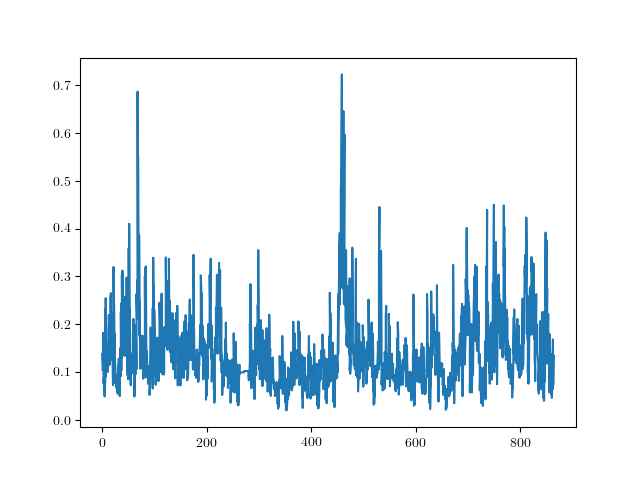

In [5]:
plt.figure()

plt.plot(Half_orbit.Orbit_nr,Half_orbit.FAC)


<IPython.core.display.Javascript object>


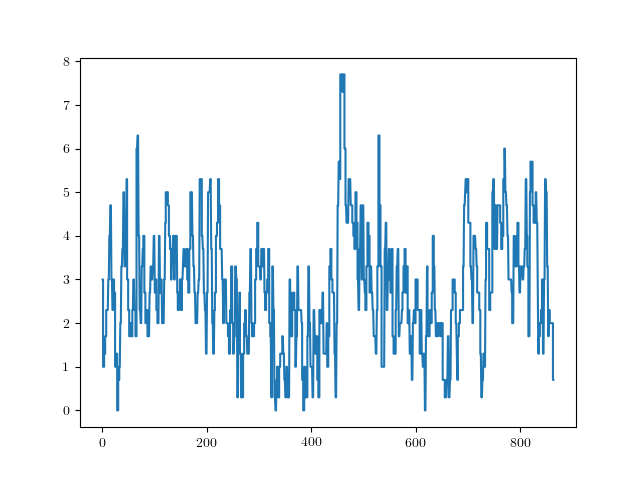

In [6]:
plt.figure()

plt.plot(Half_orbit.Orbit_nr,Half_orbit.Kp)

In [7]:
FAC = pd.read_pickle('/home/simon/Desktop/Bachelor_project/data/pkl_files/FAC_filter.pkl')
DNS = pd.read_pickle('/home/simon/Desktop/Bachelor_project/data/pkl_files/DNS_normalized.pkl')
Electro_jets = pd.read_pickle('/home/simon/Desktop/Bachelor_project/data/pkl_files/Electro_jets.pkl')

# Color_map function

### Storm Marts

In [8]:
lat = 'mLatitude'

In [9]:
DNS_Z,DNS_index,DNS_dates,DNS_orbit = my.Color_map(DNS,'2015-03-15-02',61,lat)

<IPython.core.display.Javascript object>


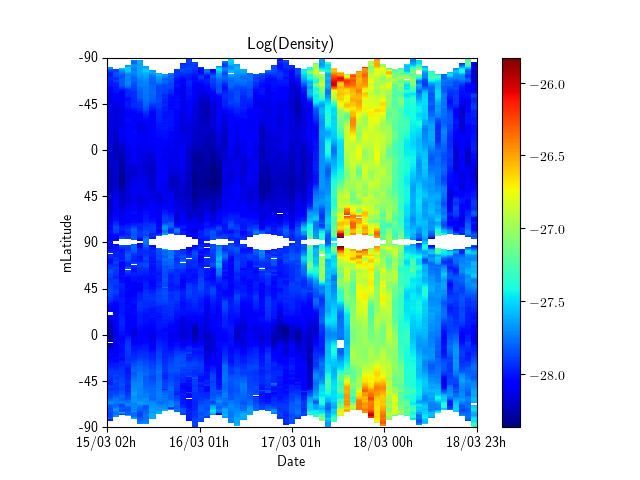

Text(0.5,1,'Log(Density)')

In [10]:
plt.figure()

# Formate the dates to a string
fig_date_str = DNS_dates.strftime('%d/%m %Hh')

# Plot the data
plt.imshow(np.log(DNS_Z), extent=[0, 5, 0, 5], aspect='equal', origin='lower',
           cmap='jet')
plt.colorbar()

# Set the ticks and labels...
# Create x labes
x_labels = fig_date_str[::15]
x_ticks = np.linspace(0,5-((len(fig_date_str)-1)%15)/len(fig_date_str)*5,len(x_labels))
plt.xticks(x_ticks, x_labels)
plt.xlabel('Date')

# Create y labes
y_labels = [-90,-45,0,45,90,45,0,-45,-90]
y_ticks = np.linspace(0,5,len(y_labels))
plt.yticks(y_ticks, y_labels)
plt.ylabel(lat)


plt.title('Log(Density)')

In [11]:
FAC_Z,FAC_index,FAC_dates,FAC_orbit = my.Color_map(FAC,'2015-03-15-02',61,lat,30,'20s')

<IPython.core.display.Javascript object>


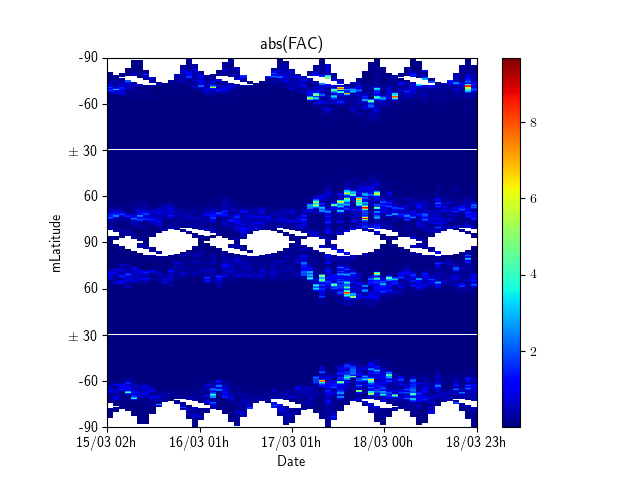

Text(0.5,1,'abs(FAC)')

In [12]:
plt.figure()

fig_date_str = FAC_dates.strftime('%d/%m %Hh')

plt.imshow(FAC_Z, extent=[0, 5, 0, 5], origin='lower',
           cmap='jet')
#cmap='seismic')
plt.colorbar()

# Set the ticks and labels...
x_labels = fig_date_str[::15]
x_ticks = np.linspace(0,5-((len(fig_date_str)-1)%15)/len(fig_date_str)*5,len(x_labels))
plt.xticks(x_ticks, x_labels)
plt.xlabel('Date')

y_ticks = np.linspace(0,5,9)
y_labels = [-90,-60,'$\pm$ 30',60,90,60,'$\pm$ 30',-60,-90]
plt.yticks(y_ticks, y_labels)
plt.ylabel(lat)


plt.title('abs(FAC)')

In [14]:
FAC_dates[0]

Timestamp('2015-03-15 02:14:10')

In [71]:
y1 = Half_orbit[FAC_dates[0]:FAC_dates[-1]].Kp
y2 = Half_orbit[FAC_dates[0]:FAC_dates[-1]].FAC
y3 = Half_orbit[FAC_dates[0]:FAC_dates[-1]].Density_norm
x = Half_orbit[FAC_dates[0]:FAC_dates[-1]].index

In [23]:
ax1.plot?

<IPython.core.display.Javascript object>


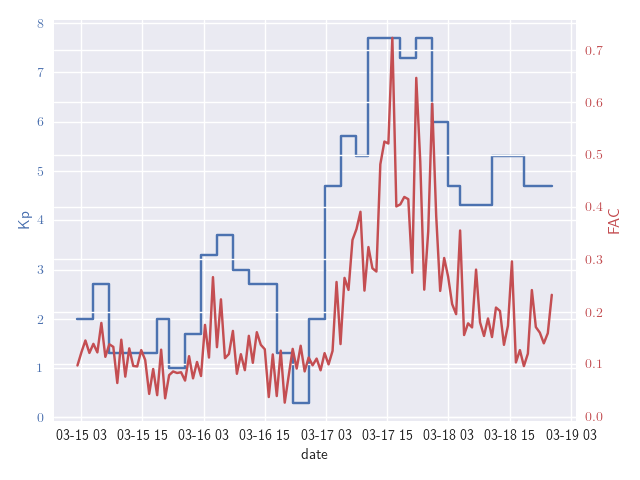

In [36]:
import seaborn as sns
sns.set()
fig, ax1 = plt.subplots()
ax1.plot(x, y1, c=sns.color_palette()[0],drawstyle = 'steps')
ax1.set_xlabel('date')
# Make the y-axis label, ticks and tick labels match the line color.
ax1.set_ylabel('Kp', color=sns.color_palette()[0])
ax1.tick_params('y', colors=sns.color_palette()[0])

ax2 = ax1.twinx()
ax2.plot(x, y2, c=sns.color_palette()[2])
ax2.set_ylabel('FAC', color=sns.color_palette()[2])
ax2.tick_params('y', colors=sns.color_palette()[2])

fig.tight_layout()
plt.show()

<IPython.core.display.Javascript object>


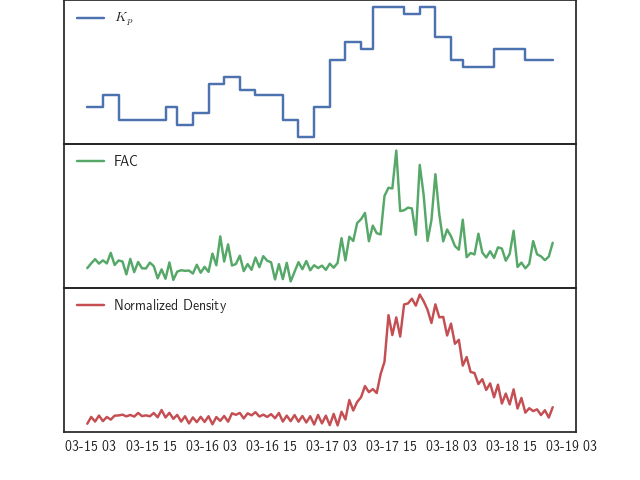

In [82]:
fig = plt.figure()
ax1 = fig.add_axes([0.1, 0.7, 0.8, 0.3],
                   xticklabels=[],yticklabels=[])
ax2 = fig.add_axes([0.1, 0.4, 0.8, 0.3],
                   xticklabels=[],yticklabels=[])
ax3 = fig.add_axes([0.1, 0.1, 0.8, 0.3],yticklabels=[])
                   
ax1.plot(x,y1,color=sns.color_palette()[0],drawstyle = 'steps',label='$K_p$')
ax2.plot(x,y2,color=sns.color_palette()[1],label='FAC')
ax3.plot(x,y3,color=sns.color_palette()[2],label='Normalized Density')

ax1.legend(loc=2)
ax2.legend(loc=2)
ax3.legend(loc=2)

In [19]:
S_jets = Electro_jets[Electro_jets.Hemisphere==-1].groupby(['Orbit_nr'])['mLatitude'].mean()
N_jets = Electro_jets[Electro_jets.Hemisphere==1].groupby(['Orbit_nr'])['mLatitude'].mean()

In [30]:
idx2=(S_jets.index >= FAC_orbit[0]) & (S_jets.index <= FAC_orbit[-1])

<IPython.core.display.Javascript object>


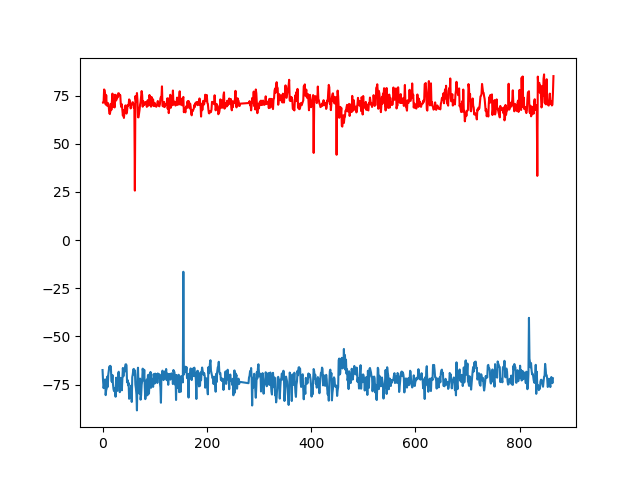

In [33]:
plt.figure()
plt.plot(S_jets.index,S_jets)
plt.plot(N_jets.index,N_jets,'r')

In [11]:
Plot_jets=Electro_jets[(Electro_jets.mN_heading==-1) &(Electro_jets.Hemisphere==1)]['2015-03-15-01':]
Plot_jets = Plot_jets.iloc[0:61,:]

<IPython.core.display.Javascript object>


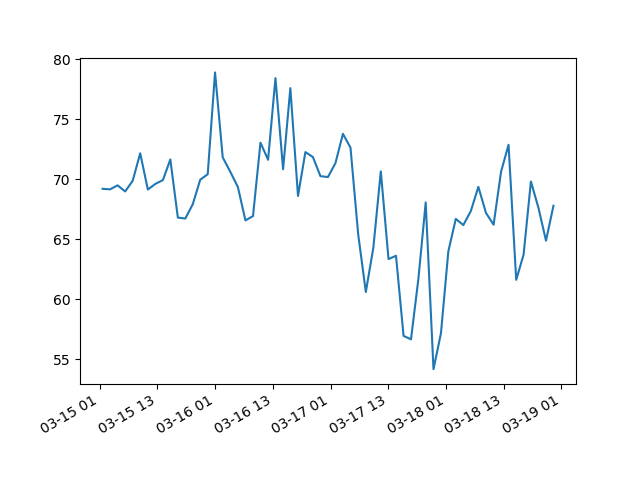

In [34]:
plt.figure()
Plot_jets.mLatitude.plot()

### Storm January

In [10]:
DNS_Z,DNS_index,DNS_dates,DNS_orbit = my.Color_map(DNS,'2015-01-05-06',37,lat)

<IPython.core.display.Javascript object>


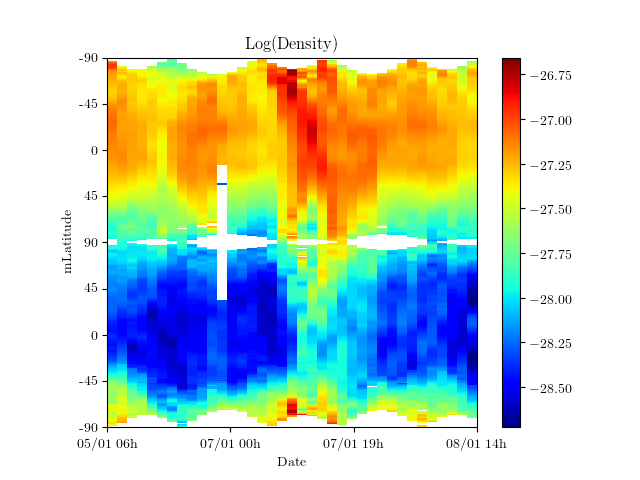

Text(0.5,1,'Log(Density)')

In [11]:
plt.figure()

# Formate the dates to a string
fig_date_str = DNS_dates.strftime('%d/%m %Hh')

# Plot the data
plt.imshow(np.log(DNS_Z), extent=[0, 5, 0, 5], aspect='equal', origin='lower',
           cmap='jet')
plt.colorbar()

# Set the ticks and labels...
# Create x labes
x_labels = fig_date_str[::12]
x_ticks = np.linspace(0,5-((len(fig_date_str)-1)%12)/len(fig_date_str)*5,len(x_labels))
plt.xticks(x_ticks, x_labels)
plt.xlabel('Date')

# Create y labes
y_labels = [-90,-45,0,45,90,45,0,-45,-90]
y_ticks = np.linspace(0,5,len(y_labels))
plt.yticks(y_ticks, y_labels)
plt.ylabel(lat)


plt.title('Log(Density)')

In [12]:
FAC_Z,FAC_index,FAC_dates,FAC_orbit = my.Color_map(FAC,'2015-01-05-06',37,lat,30,'20s')

<IPython.core.display.Javascript object>


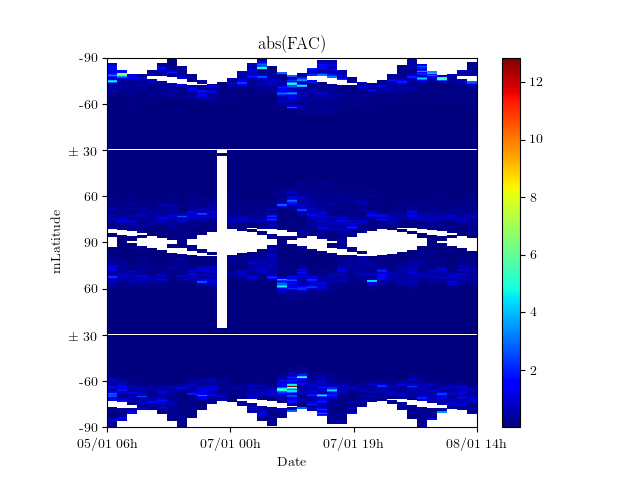

Text(0.5,1,'abs(FAC)')

In [13]:
plt.figure()

fig_date_str = FAC_dates.strftime('%d/%m %Hh')

plt.imshow(FAC_Z, extent=[0, 5, 0, 5], origin='lower',
           cmap='jet')
#cmap='seismic')
plt.colorbar()

# Set the ticks and labels...
x_labels = fig_date_str[::12]
x_ticks = np.linspace(0,5-((len(fig_date_str)-1)%12)/len(fig_date_str)*5,len(x_labels))
plt.xticks(x_ticks, x_labels)
plt.xlabel('Date')

y_ticks = np.linspace(0,5,9)
y_labels = [-90,-60,'$\pm$ 30',60,90,60,'$\pm$ 30',-60,-90]
plt.yticks(y_ticks, y_labels)
plt.ylabel(lat)


plt.title('abs(FAC)')

In [50]:
Plot_jets=Electro_jets[(Electro_jets.mN_heading==1) &(Electro_jets.Hemisphere==-1)]['2015-01-05-06':]
Plot_jets = Plot_jets.iloc[0:37,:]

<IPython.core.display.Javascript object>


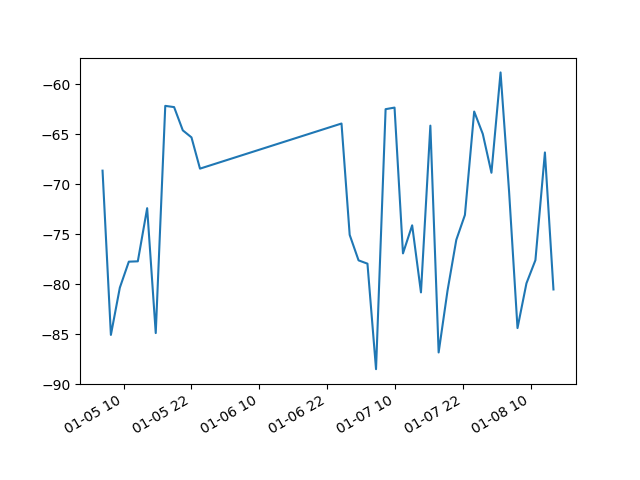

In [51]:
plt.figure()
Plot_jets.mLatitude.plot()

<IPython.core.display.Javascript object>


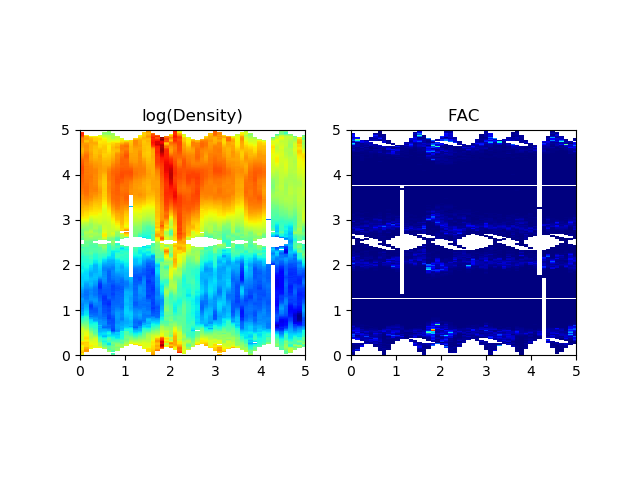

Text(0.5,1,'FAC')

In [16]:
plt.figure()

plt.subplot(1, 2, 1)
plt.imshow(np.log(DNS_Z), extent=[0, 5, 0, 5], origin='lower',
           cmap='jet')
#plt.colorbar()
plt.axis(aspect='image')
plt.title('log(Density)')

plt.subplot(1, 2, 2)

plt.imshow(FAC_Z, extent=[0, 5, 0, 5], origin='lower',
           cmap='jet')
#plt.colorbar()
plt.axis(aspect='image')
plt.title('FAC')